## Step1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats
import pandas as pd
import ydata_profiling as pp
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ast
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Step 2: Load the dataset

In [2]:
data= pd.read_csv('updated_dataset.csv',encoding='ISO-8859-1')
data.head(n=10)

ID  Oxygen  PulseRate  Temperature  Age  Diabetes  bp_systolic  \
0   0    98.0       65.0         95.0   20        61          118   
1   1    96.0       92.0         95.0   27        95          104   
2   2    95.0       92.0         99.0   42        72          105   
3   3    97.0       56.0         96.0   40        94          104   
4   4    88.0       94.0         98.0   23        83           90   
5   5    94.0      100.0        103.0   39        67          120   
6   6    88.0       81.0        104.0   53        82          150   
7   7    91.0       79.0         95.0   31        82          104   
8   8    93.0       59.0        101.0   19        65          104   
9   9    86.0      117.0         99.0   19        61           94   

   bp_diastolic                               IdentifiedConditions  \
0            75  Normal oxygen\nNormal pulse rate\nNormal tempe...   
1            74  Normal oxygen\nNormal pulse rate\nNormal tempe...   
2            69  Warningly low oxygen\nNormal pulse rate\nModer...   
3            69  Normal oxygen\nLow pulse rate\nNormal temperat...   
4            60  Very low oxygen\nNormal pulse rate\nNormal tem...   
5            85  Warningly low oxygen\nNormal pulse rate\nHigh ...   
6            99  Very low oxygen\nNormal pulse rate\nVery high ...   
7            77  Low oxygen\nNormal pulse rate\nNormal temperat...   
8            73  Warningly low oxygen\nLow pulse rate\nHigh tem...   
9            64  Very low oxygen\nHigh pulse rate\nModerate tem...   

                                   PrescriptionSteps  
0  No specific steps for oxygen saturation.\nNo s...  
1  No specific steps for oxygen saturation.\nNo s...  
2  Keep a close eye on oxygen saturation levels a...  
3  No specific steps for oxygen saturation.\nMoni...  
4  Seek immediate medical attention, use suppleme...  
5  Keep a close eye on oxygen saturation levels a...  
6  Seek immediate medical attention, use suppleme...  
7  Seek medical attention and consider using supp...  
8  Keep a close eye on oxygen saturation levels a...  
9  Seek immediate medical attention, use suppleme...

## Step 3: Data Understanding

In [3]:
profile = pp.ProfileReport(data, title="Silverline Phase-1 Vaccination Report", dark_mode=False, progress_bar=False, explorative=True, plot={"correlation": {"cmap": "coolwarm", "bad": "#000000"}})
profile.to_notebook_iframe()

## Step 4:  Finding the correlation

In [4]:
import pandas as pd

# Read the dataset from the CSV file
df= pd.read_csv('updated_dataset.csv',encoding='ISO-8859-1')


# Select the columns you want to include in the correlation matrix
selected_columns =['ID', 'Oxygen', 'PulseRate', 'Temperature','Age', 'Diabetes','bp_systolic','bp_diastolic']

# Create a new DataFrame with the selected columns
selected_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                    ID    Oxygen  PulseRate  Temperature       Age  Diabetes  \
ID            1.000000  0.001777  -0.015814     0.004673  0.015360  0.004166   
Oxygen        0.001777  1.000000  -0.012726    -0.008755  0.006386  0.028335   
PulseRate    -0.015814 -0.012726   1.000000     0.026917 -0.010532 -0.008481   
Temperature   0.004673 -0.008755   0.026917     1.000000 -0.004019  0.012304   
Age           0.015360  0.006386  -0.010532    -0.004019  1.000000 -0.012754   
Diabetes      0.004166  0.028335  -0.008481     0.012304 -0.012754  1.000000   
bp_systolic   0.023754  0.018681   0.000366    -0.000293  0.387473 -0.015697   
bp_diastolic  0.024657 -0.003371  -0.007598     0.004896  0.325605 -0.014857   

              bp_systolic  bp_diastolic  
ID               0.023754      0.024657  
Oxygen           0.018681     -0.003371  
PulseRate        0.000366     -0.007598  
Temperature     -0.000293      0.004896  
Age              0.387473      0.325605  
Diabetes        -0.015697  

## Step 5:Data Prepration

### Handeling missing values using imputation techniques

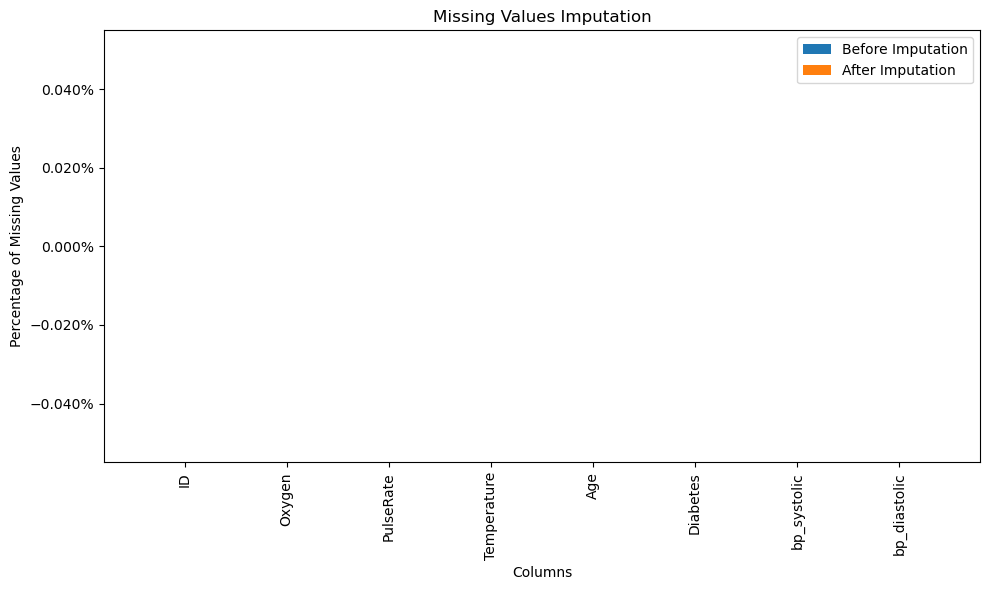

In [5]:
%matplotlib inline
# Select numeric columns for mean calculation
numeric_columns = data.select_dtypes(include=np.number)

# Calculate the percentage of missing values before imputation
missing_values_before = numeric_columns.isnull().sum() / len(numeric_columns) * 100

# Perform mean imputation
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
numeric_columns_imputed = numeric_columns.fillna(numeric_columns.mean())

# Calculate the percentage of missing values after imputation
missing_values_after = numeric_columns_imputed.isnull().sum() / len(numeric_columns_imputed) * 100

# Create a bar plot to visualize the missing values
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(numeric_columns.columns, missing_values_before, label='Before Imputation')
ax.bar(numeric_columns_imputed.columns, missing_values_after, label='After Imputation')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Missing Values Imputation')
ax.legend()
plt.xticks(rotation=90)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

plt.tight_layout()
plt.show()

The missing values in the dataset are handled using mean imputation for numeric columns. The code calculates the percentage of missing values before and after imputation, and a bar plot is generated to visualize the impact of imputation. Mean imputation replaces missing values with the mean of the respective column. Imputation helps in preserving the overall structure of the data and ensures that no data points are lost due to missing values.

## Step 5: Modeling Using Unsupervised Learning

### Select the features for clustering

In [6]:
cluster_features = ['Oxygen', 'PulseRate', 'Temperature','Age','bp_systolic','bp_diastolic','Diabetes']

## With 4 clusters

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data[cluster_features])

KMeans(n_clusters=4, random_state=42)

In [8]:
data['cluster_label'] = kmeans.labels_

In [9]:
# Cluster Analysis
# Here, you can perform analysis on each cluster to gain insights into different types of volunteers

# Iterate over each cluster label
for cluster_label in data['cluster_label'].unique():
    print(f"Cluster {cluster_label} Analysis:")
    
    # Filter the data points belonging to the current cluster label
    cluster_data = data[data['cluster_label'] == cluster_label]
    
    # Perform analysis on the cluster data
    # Example: Calculate mean, average, standard deviation, and count for each feature
    feature_stats = cluster_data[cluster_features].agg(['mean', 'std', 'count'])
    print(feature_stats)
    
    print('\n')




Cluster 1 Analysis:
            Oxygen    PulseRate  Temperature          Age  bp_systolic  \
mean     92.639529    55.128548    99.966792    34.276915   108.304767   
std       4.657647     8.883404     3.202854    12.900681    12.063684   
count  1867.000000  1867.000000  1867.000000  1867.000000  1867.000000   

       bp_diastolic     Diabetes  
mean      71.773433    79.650241  
std        7.561579    11.528998  
count   1867.000000  1867.000000  


Cluster 3 Analysis:
            Oxygen    PulseRate  Temperature          Age  bp_systolic  \
mean     92.580277    84.992784    99.936861    33.141311   106.075165   
std       4.622776     8.880471     3.182984    12.216799    10.241712   
count  1663.000000  1663.000000  1663.000000  1663.000000  1663.000000   

       bp_diastolic     Diabetes  
mean      70.767288    79.721587  
std        7.108449    11.682423  
count   1663.000000  1663.000000  


Cluster 0 Analysis:
            Oxygen    PulseRate  Temperature          Age  bp_

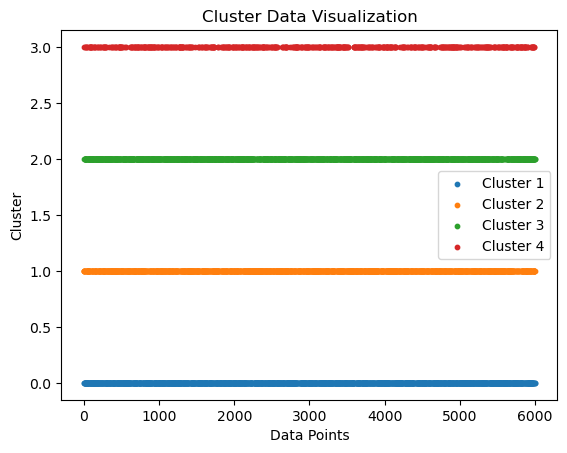

In [10]:
import matplotlib.pyplot as plt

# Assuming 'data' contains your dataset with the cluster labels assigned

# Create separate dataframes for each cluster
cluster_data = []
for cluster_label in data['cluster_label'].unique():
    cluster_data.append(data[data['cluster_label'] == cluster_label])

# Create scatter plots for each cluster
for i, cluster_df in enumerate(cluster_data):
    plt.scatter(cluster_df.index, [i] * len(cluster_df), label=f'Cluster {i+1}', s=10)

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.title('Cluster Data Visualization')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [19]:
# Assuming 'data' contains your dataset with the cluster labels assigned

# Create a dictionary to map cluster labels to zone names
cluster_zone_mapping = {
    0: 'Green Zone',
    1: 'Yellow Zone',
    2: 'Amber Zone',
    3: 'Red Zone'
}

# Create a new column 'Zone' in the 'data' DataFrame based on the cluster labels
data['Zone'] = data['cluster_label'].map(cluster_zone_mapping)

# Display the data with the assigned zone names
print(data[['ID', 'Oxygen', 'PulseRate', 'Temperature', 'bp_systolic', 'bp_diastolic', 'cluster_label', 'Zone']])


        ID  Oxygen  PulseRate  Temperature  bp_systolic  bp_diastolic  \
0        0    98.0       65.0         95.0          118            75   
1        1    96.0       92.0         95.0          104            74   
2        2    95.0       92.0         99.0          105            69   
3        3    97.0       56.0         96.0          104            69   
4        4    88.0       94.0         98.0           90            60   
...    ...     ...        ...          ...          ...           ...   
5995  5995   100.0       70.0        104.0          100            62   
5996  5996    89.0      130.0        103.0          111            66   
5997  5997    97.0      109.0         99.0          123            86   
5998  5998    87.0       70.0        101.0          107            75   
5999  5999    96.0       47.0        105.0           96            66   

      cluster_label         Zone  
0                 1  Yellow Zone  
1                 3     Red Zone  
2                 

# Descision tree

In [11]:
# Select the features and target variables
features = ['Oxygen', 'PulseRate', 'Temperature', 'Age', 'bp_systolic', 'bp_diastolic', 'Diabetes']
target_conditions = 'IdentifiedConditions'
target_steps = 'PrescriptionSteps'

# Split the data into features and target variables
X = data[features]
y_conditions = data[target_conditions]
y_steps = data[target_steps]

# Split the data into training and testing sets
X_train, X_test, y_train_conditions, y_test_conditions, y_train_steps, y_test_steps = train_test_split(X, y_conditions, y_steps, test_size=0.2, random_state=42)


In [12]:
# Initialize the decision tree classifier
conditions_classifier = DecisionTreeClassifier()

# Train the model on the training data
conditions_classifier.fit(X_train, y_train_conditions)


DecisionTreeClassifier()

In [13]:
# Make predictions on the test data
conditions_predictions = conditions_classifier.predict(X_test)

# Evaluate the model's performance
conditions_report = classification_report(y_test_conditions, conditions_predictions)
print("Classification Report for IdentifiedConditions:")
print(conditions_report)


Classification Report for IdentifiedConditions:
                                                                                                                 precision    recall  f1-score   support

                          Low oxygen
High pulse rate
High temperature
Low risk of diabetes
High blood pressure
       1.00      1.00      1.00         1
                        Low oxygen
High pulse rate
High temperature
Low risk of diabetes
Normal blood pressure
       1.00      1.00      1.00        14
                      Low oxygen
High pulse rate
Moderate temperature
Low risk of diabetes
High blood pressure
       1.00      1.00      1.00         2
               Low oxygen
High pulse rate
Moderate temperature
Low risk of diabetes
High-normal blood pressure
       1.00      1.00      1.00         1
                    Low oxygen
High pulse rate
Moderate temperature
Low risk of diabetes
Normal blood pressure
       0.88      1.00      0.93         7
                                 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [14]:
# Initialize the decision tree classifier
steps_classifier = DecisionTreeClassifier()

# Train the model on the training data
steps_classifier.fit(X_train, y_train_steps)


DecisionTreeClassifier()

In [15]:
# Make predictions on the test data
steps_predictions = steps_classifier.predict(X_test)

# Evaluate the model's performance
steps_report = classification_report(y_test_steps, steps_predictions)
print("Classification Report for PrescriptionSteps:")
print(steps_report)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for PrescriptionSteps:
                                                                                                                                                                                                                                                                                                                                                                       precision    recall  f1-score   support

                                                                                                            Keep a close eye on oxygen saturation levels and consider doing breathing exercises.
Keep warm and monitor temperature. If it persists, seek medical attention.
Individuals have a low risk of developing diabetes.No specific steps for blood pressure.
       0.00      0.00      0.00         1
                                                                              Keep a close eye on oxygen saturation levels and consider doing breathing exer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classificat

In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for IdentifiedConditions
conditions_accuracy = accuracy_score(y_test_conditions, conditions_predictions)
print("Accuracy for IdentifiedConditions: {:.2%}".format(conditions_accuracy))

# Calculate accuracy for PrescriptionSteps
steps_accuracy = accuracy_score(y_test_steps, steps_predictions)
print("Accuracy for PrescriptionSteps: {:.2%}".format(steps_accuracy))


Accuracy for IdentifiedConditions: 94.92%
Accuracy for PrescriptionSteps: 94.92%


In [17]:
# Make predictions on the test data
steps_predictions = steps_classifier.predict(X_test)

# Create a DataFrame to store the predicted and actual PrescriptionSteps
results = pd.DataFrame({'Actual PrescriptionSteps': y_test_steps, 'Predicted PrescriptionSteps': steps_predictions})

# Display the results
print(results)


                               Actual PrescriptionSteps  \
1782  Keep a close eye on oxygen saturation levels a...   
3917  Keep a close eye on oxygen saturation levels a...   
221   No specific steps for oxygen saturation.\nMoni...   
2135  Seek medical attention and consider using supp...   
5224  Seek immediate medical attention, use suppleme...   
...                                                 ...   
2543  Seek medical attention and consider using supp...   
1773  Seek immediate medical attention, use suppleme...   
2846  Keep a close eye on oxygen saturation levels a...   
5799  Seek immediate medical attention, use suppleme...   
1765  Seek medical attention and consider using supp...   

                            Predicted PrescriptionSteps  
1782  Keep a close eye on oxygen saturation levels a...  
3917  Keep a close eye on oxygen saturation levels a...  
221   No specific steps for oxygen saturation.\nMoni...  
2135  Seek medical attention and consider using supp...  
5

In [18]:
# Make predictions on the test data
conditions_predictions = conditions_classifier.predict(X_test)

# Create a DataFrame to store the predicted and actual IdentifiedConditions
results = pd.DataFrame({'Actual IdentifiedConditions': y_test_conditions, 'Predicted IdentifiedConditions': conditions_predictions})

# Display the results
print(results)


                            Actual IdentifiedConditions  \
1782  Warningly low oxygen\nNormal pulse rate\nVery ...   
3917  Warningly low oxygen\nHigh pulse rate\nNormal ...   
221   Normal oxygen\nLow pulse rate\nModerate temper...   
2135  Low oxygen\nHigh pulse rate\nNormal temperatur...   
5224  Very low oxygen\nNormal pulse rate\nNormal tem...   
...                                                 ...   
2543  Low oxygen\nHigh pulse rate\nVery high tempera...   
1773  Very low oxygen\nVery high pulse rate\nNormal ...   
2846  Warningly low oxygen\nNormal pulse rate\nVery ...   
5799  Very low oxygen\nLow pulse rate\nHigh temperat...   
1765  Low oxygen\nNormal pulse rate\nHigh temperatur...   

                         Predicted IdentifiedConditions  
1782  Warningly low oxygen\nNormal pulse rate\nVery ...  
3917  Warningly low oxygen\nHigh pulse rate\nNormal ...  
221   Normal oxygen\nLow pulse rate\nModerate temper...  
2135  Low oxygen\nHigh pulse rate\nNormal temperatur...  
5

In [25]:
# Select the columns to display
display_columns = [ 'Oxygen', 'PulseRate', 'Temperature', 'bp_systolic', 'bp_diastolic', 'Predicted IdentifiedConditions', 'Predicted PrescriptionSteps']

# Create a DataFrame with the selected columns and predicted values
display_data = X_test.copy()
display_data['Predicted IdentifiedConditions'] = conditions_predictions
display_data['Predicted PrescriptionSteps'] = steps_predictions

# Display the selected columns
print(display_data[display_columns])


      Oxygen  PulseRate  Temperature  bp_systolic  bp_diastolic  \
1782    95.0       74.0        104.0          104            72   
3917    95.0      109.0         95.0           99            64   
221    100.0       58.0         99.0          176            96   
2135    89.0      103.0         97.0          110            68   
5224    88.0       79.0         98.0          136            66   
...      ...        ...          ...          ...           ...   
2543    92.0      113.0        104.0          134            87   
1773    86.0      122.0         98.0          101            66   
2846    94.0       79.0        105.0           95            61   
5799    88.0       57.0        101.0           96            78   
1765    90.0       88.0        101.0          115            66   

                         Predicted IdentifiedConditions  \
1782  Warningly low oxygen\nNormal pulse rate\nVery ...   
3917  Warningly low oxygen\nHigh pulse rate\nNormal ...   
221   Normal oxyge

In [27]:
# Assuming 'data' contains your dataset with the cluster labels assigned and IdentifiedConditions, PrescriptionSteps columns

# Create a dictionary to map cluster labels to zone names
cluster_zone_mapping = {
    0: 'Green Zone',
    1: 'Yellow Zone',
    2: 'Amber Zone',
    3: 'Red Zone'
}

# Create a new column 'Zone' in the 'data' DataFrame based on the cluster labels
data['Zone'] = data['cluster_label'].map(cluster_zone_mapping)

# Display the assigned zone, IdentifiedConditions, and PrescriptionSteps
print(data[['Zone', 'IdentifiedConditions', 'PrescriptionSteps']])


             Zone                               IdentifiedConditions  \
0     Yellow Zone  Normal oxygen\nNormal pulse rate\nNormal tempe...   
1        Red Zone  Normal oxygen\nNormal pulse rate\nNormal tempe...   
2        Red Zone  Warningly low oxygen\nNormal pulse rate\nModer...   
3     Yellow Zone  Normal oxygen\nLow pulse rate\nNormal temperat...   
4        Red Zone  Very low oxygen\nNormal pulse rate\nNormal tem...   
...           ...                                                ...   
5995     Red Zone  Normal oxygen\nNormal pulse rate\nVery high te...   
5996   Green Zone  Low oxygen\nVery high pulse rate\nHigh tempera...   
5997   Green Zone  Normal oxygen\nHigh pulse rate\nModerate tempe...   
5998  Yellow Zone  Very low oxygen\nNormal pulse rate\nHigh tempe...   
5999  Yellow Zone  Normal oxygen\nLow pulse rate\nVery high tempe...   

                                      PrescriptionSteps  
0     No specific steps for oxygen saturation.\nNo s...  
1     No specific s